In [ ]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import random

# Deep Learning
import keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense,  SeparableConv2D, Conv2D , Conv3D, MaxPool3D, MaxPool2D , Flatten, Input, Concatenate, concatenate , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from bibliotheque_projet import import_data, separation_data, creation_model, fit_model, creation_y

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = ["3", "2"]
electrodes = ["C3" , "C4" , "Cz"]

racine_ondelettes = "/content/drive/MyDrive/Projet_E4_Interface_Cerveau_Machine/Bases de données EEG/Bases de données/Desc_IIIa_COEF_cropped/k3b_coef"

# Importation des données

In [ ]:
data_scalo = import_data(electrodes[0], racine_ondelettes, labels)
X_train1, X_test1, X_val1, y_train1, y_test1, y_val1 = separation_data(data_scalo)
print(X_train1.shape)

data_spectro = import_data(electrodes[1], racine_ondelettes, labels)
X_train2, X_test2, X_val2, y_train2, y_test2, y_val2 = separation_data(data_spectro)
print(X_train2.shape)

data_scalo2 = import_data(electrodes[2], racine_ondelettes, labels)
X_train3, X_test3, X_val3, y_train3, y_test3, y_val3 = separation_data(data_scalo2)
print(X_train3.shape)

(69, 250, 250, 3)
(69, 250, 250, 3)
(69, 250, 250, 3)


In [ ]:
y_train = creation_y(y_train1, labels)
y_test = creation_y(y_test1, labels)
y_val = creation_y(y_val1, labels)

# On définit notre premier modèle

Notre modèle va prendre 6 entrées:
- l'image du scalogramme et du spectrogramme de l'électrode C3,
- l'image du scalogramme et du spectrogramme de l'électrode C4,
- l'image du scalogramme et du spectrogramme de l'électrode Cz

In [ ]:
shape = np.shape(X_train1)

input_1 = Input(shape=shape[1:])
input_2 = Input(shape=shape[1:])
input_3 = Input(shape=shape[1:])

model = concatenate([input_1, input_2, input_3], axis = -1)


model = Conv2D(32, (3,3)) (model)
model = Activation("relu") (model)
model = MaxPool2D((2,2)) (model)
model = Activation('relu') (model)
model = Dense(32) (model)
model = Dropout(0.2) (model)

model = Conv2D(64, (3,3)) (model)
model = Activation("relu") (model)
model = MaxPool2D((2,2)) (model)
model = Activation('relu') (model)
model = Dense(64) (model)
model = Dropout(0.2) (model)

model = Conv2D(128, (3,3)) (model)
model = Activation("relu") (model)
model = MaxPool2D((2,2)) (model)
model = Activation('relu') (model)
model = Dense(128) (model)
model = Dropout(0.2) (model)

model = Flatten() (model)
model = Dense(128) (model)
model = Activation('relu') (model)
model = Dropout(0.5) (model)
model = Dense(2) (model)

output = Activation('softmax') (model)

model = Model([input_1, input_2, input_3], output)

model.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_85 (InputLayer)           [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
input_86 (InputLayer)           [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
input_87 (InputLayer)           [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
concatenate_28 (Concatenate)    (None, 250, 250, 9)  0           input_85[0][0]                   
                                                                 input_86[0][0]            

In [ ]:
epochs = 50
batch_size = int(len(X_train1)/ 12)

datagen = ImageDataGenerator( shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train1)

model.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit([X_train1, X_train2, X_train3], y_train, batch_size = 16, 
          steps_per_epoch= int(len(X_train1) / 16),
          epochs=epochs,
          validation_data = ([X_val1, X_val2, X_val3], y_val))

Epoch 1/50
4/4 [==============================] - 1s 161ms/step - loss: 6.6591 - accuracy: 0.5000 - val_loss: 2.2076 - val_accuracy: 0.4000
Epoch 2/50
4/4 [==============================] - 0s 74ms/step - loss: 4.9330 - accuracy: 0.5355 - val_loss: 0.8268 - val_accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 0s 61ms/step - loss: 2.4562 - accuracy: 0.5912 - val_loss: 0.7118 - val_accuracy: 0.4000
Epoch 4/50
4/4 [==============================] - 0s 62ms/step - loss: 1.1989 - accuracy: 0.6180 - val_loss: 0.6798 - val_accuracy: 0.6000
Epoch 5/50
4/4 [==============================] - 0s 60ms/step - loss: 1.3091 - accuracy: 0.2879 - val_loss: 0.8042 - val_accuracy: 0.4000
Epoch 6/50
4/4 [==============================] - 0s 70ms/step - loss: 0.7268 - accuracy: 0.5000 - val_loss: 0.8627 - val_accuracy: 0.4000
Epoch 7/50
4/4 [==============================] - 0s 69ms/step - loss: 0.7105 - accuracy: 0.5288 - val_loss: 0.8982 - val_accuracy: 0.4000
Epoch 8/50
4/4 [==========

summarize history for accuracy


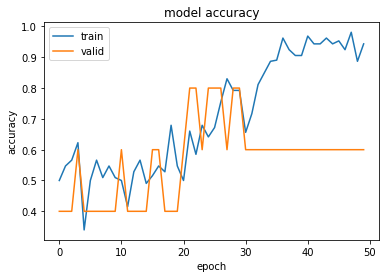

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
print("summarize history for accuracy")

In [ ]:
y_pred_final = model.predict([X_test1, X_test2, X_test3])
un = np.argmax(y_pred_final, axis = 1)

deux = np.argmax(y_test, axis = 1)

print("prédictions : {}".format(un))
print("vraies valeurs : {}".format(deux))

print("précision : {:.{prec}f}%".format((un == deux).sum()/len(un), prec=2))

prédictions : [0 1 1 1 1 0 0 1 0 0 0 1 1]
vraies valeurs : [0 1 1 1 1 0 0 1 0 1 0 1 0]
précision : 0.85%


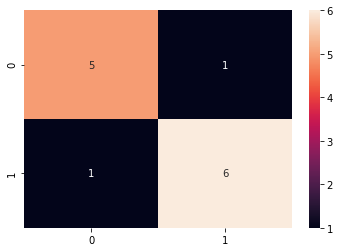

In [ ]:
sns.heatmap(confusion_matrix(deux, un), annot=True)

In [ ]:
racine_ondelettes2 = "/content/drive/MyDrive/Projet_E4_Interface_Cerveau_Machine/Bases de données EEG/Bases de données/Desc_IIIa_COEF_cropped/l1b_coef"

data_scalo_bis = import_data(electrodes[0], racine_ondelettes2, labels)
X_train1_bis, X_test1_bis, X_val1_bis, y_train1_bis, y_test1_bis, y_val1_bis = separation_data(data_scalo_bis)
print(X_train1_bis.shape)

data_spectro_bis = import_data(electrodes[1], racine_ondelettes2, labels)
X_train2_bis, X_test2_bis, X_val2_bis, y_train2_bis, y_test2_bis, y_val2_bis = separation_data(data_spectro_bis)
print(X_train2_bis.shape)

data_scalo2_bis = import_data(electrodes[2], racine_ondelettes2, labels)
X_train3_bis, X_test3_bis, X_val3_bis, y_train3_bis, y_test3_bis, y_val3_bis = separation_data(data_scalo2_bis)
print(X_train3_bis.shape)

(46, 250, 250, 3)
(46, 250, 250, 3)
(46, 250, 250, 3)


In [ ]:
print(X_val1_bis.shape)
print(y_val_bis.shape)

(5, 250, 250, 3)
(5, 2)


In [ ]:
y_train_bis = creation_y(y_train1_bis, labels)
y_test_bis = creation_y(y_test1_bis, labels)
y_val_bis = creation_y(y_val1_bis, labels)

In [ ]:
shape = np.shape(X_train1_bis)

input_4 = Input(shape=shape[1:])
input_5 = Input(shape=shape[1:])
input_6 = Input(shape=shape[1:])

model1 = concatenate([input_4, input_5, input_6], axis = -1)

model1 = Conv2D(32, (3,3)) (model1)
model1 = Activation("relu") (model1)
model1 = MaxPool2D((2,2)) (model1)
model1 = Activation('relu') (model1)
model1 = Dense(32) (model1)
model1 = Dropout(0.2) (model1)

model1 = Conv2D(64, (3,3)) (model1)
model1 = Activation("relu") (model1)
model1 = MaxPool2D((2,2)) (model1)
model1 = Activation('relu') (model1)
model1 = Dense(64) (model1)
model1 = Dropout(0.2) (model1)

model1 = Conv2D(128, (3,3)) (model1)
model1 = Activation("relu") (model1)
model1 = MaxPool2D((2,2)) (model1)
model1 = Activation('relu') (model1)
model1 = Dense(128) (model1)
model1 = Dropout(0.2) (model1)

model1 = Flatten() (model1)
model1 = Dense(128) (model1)
model1 = Activation('relu') (model1)
model1 = Dropout(0.5) (model1)
model1 = Dense(2) (model1)

output = Activation('softmax') (model1)

model1 = Model([input_4, input_5, input_6], output)

model1.summary()

Model: "model_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_112 (InputLayer)          [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
input_113 (InputLayer)          [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
input_114 (InputLayer)          [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
concatenate_37 (Concatenate)    (None, 250, 250, 9)  0           input_112[0][0]                  
                                                                 input_113[0][0]           

In [ ]:
epochs = 50
batch_size = int(len(X_train1_bis)/ 12)

model1.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model1.fit([X_train1_bis, X_train2_bis, X_train3_bis], y_train_bis, batch_size = 16, 
          steps_per_epoch= int(len(X_train1_bis) / 16),
          epochs=epochs,
          validation_data = ([X_val1_bis, X_val2_bis, X_val3_bis], y_val_bis))

Epoch 1/50
2/2 [==============================] - 1s 347ms/step - loss: 1.6978 - accuracy: 0.4583 - val_loss: 1.1096 - val_accuracy: 0.6000
Epoch 2/50
2/2 [==============================] - 0s 119ms/step - loss: 2.3618 - accuracy: 0.5921 - val_loss: 0.9541 - val_accuracy: 0.6000
Epoch 3/50
2/2 [==============================] - 0s 108ms/step - loss: 1.1574 - accuracy: 0.6750 - val_loss: 0.8234 - val_accuracy: 0.4000
Epoch 4/50
2/2 [==============================] - 0s 110ms/step - loss: 0.8565 - accuracy: 0.6458 - val_loss: 0.6659 - val_accuracy: 0.6000
Epoch 5/50
2/2 [==============================] - 0s 115ms/step - loss: 1.2341 - accuracy: 0.4762 - val_loss: 0.8914 - val_accuracy: 0.4000
Epoch 6/50
2/2 [==============================] - 0s 104ms/step - loss: 0.9229 - accuracy: 0.4556 - val_loss: 0.6694 - val_accuracy: 0.6000
Epoch 7/50
2/2 [==============================] - 0s 104ms/step - loss: 0.8401 - accuracy: 0.4583 - val_loss: 0.6937 - val_accuracy: 0.4000
Epoch 8/50
2/2 [====

summarize history for accuracy


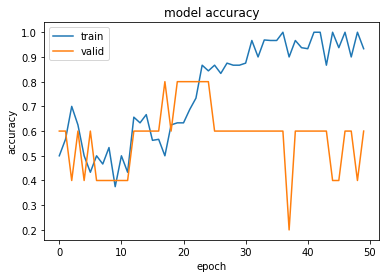

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
print("summarize history for accuracy")

In [ ]:
y_pred_final_bis = model1.predict([X_test1_bis, X_test2_bis, X_test3_bis])
un_bis = np.argmax(y_pred_final_bis, axis = 1)

deux_bis = np.argmax(y_test_bis, axis = 1)

print(un_bis)
print(deux_bis)

(un_bis == deux_bis).sum()/len(un_bis)

print("prédictions : {}".format(un_bis))
print("vraies valeurs : {}".format(deux_bis))

print("précision : {:.{prec}f}%".format((un_bis == deux_bis).sum()/len(un_bis), prec=2))

[0 0 1 0 1 0 1]
[0 1 1 0 1 0 0]
prédictions : [0 0 1 0 1 0 1]
vraies valeurs : [0 1 1 0 1 0 0]
précision : 0.71%


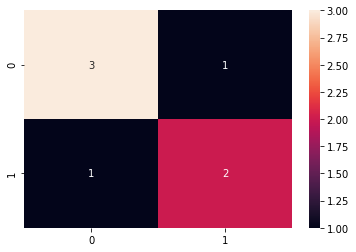

In [ ]:
sns.heatmap(confusion_matrix(deux_bis, un_bis), annot=True)

# Suite

In [ ]:
input_shape = np.shape(X_train1)

model = Sequential()

model.add(Conv2D(32, (3,3), input_size = input_shape[1:], activation = "relu"))
model.add(MaxPool2D(32, (2,2), activation = "relu"))
model.add(Dense(32, activation = "relu"))

model.add(Conv2D(64, (3,3), input_size = input_shape[1:], activation = "relu"))
model.add(MaxPool2D(64, (2,2), activation = "relu"))
model.add(Dense(64, activation = "relu"))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

model.summary

NameError: ignored

# Entrainement d'un modele qui prend en entrée la prédiction de 3 autres

**Entraînement des 3 modèles**

In [ ]:
shape = np.shape(X_train1)

input_1 = Input(shape=shape[1:])
input_2 = Input(shape=shape[1:])
input_3 = Input(shape=shape[1:])
input_4 = Input(shape=shape[1:])
input_5 = Input(shape=shape[1:])
input_6 = Input(shape=shape[1:])

#modele 1
model_1 = concatenate([input_1, input_2], axis = -1)
model_1 = Conv2D(32, (3,3)) (model_1)
model_1 = Activation("relu") (model_1)
model_1 = MaxPool2D(32, (2,2)) (model_1)
model_1 = Activation('relu') (model_1)
model_1 = Dense(32) (model_1)
model_1 = Dropout(0.2) (model_1)

model_1 = Conv2D(64, (3,3)) (model_1)
model_1 = Activation("relu") (model_1)
model_1 = MaxPool2D(64, (2,2)) (model_1)
model_1 = Activation('relu') (model_1)
model_1 = Dense(64) (model_1)
model_1 = Dropout(0.25) (model_1)

model_1 = Flatten() (model_1)
model_1 = Dense(64) (model_1)
model_1 = Activation('relu') (model_1)
model_1 = Dropout(0.5) (model_1)
model_1 = Dense(4) (model_1)

output_1 = Activation('softmax') (model_1)

model_1 = Model([input_1, input_2], output_1)

#modele2
model_2 = concatenate([input_3, input_4], axis = -1)
model_2 = Conv2D(32, (3,3)) (model_2)
model_2 = Activation("relu") (model_2)
model_2 = MaxPool2D(32, (2,2)) (model_2)
model_2 = Activation('relu') (model_2)
model_2 = Dense(32) (model_2)
model_2 = Dropout(0.2) (model_2)

model_2 = Conv2D(64, (3,3)) (model_2)
model_2 = Activation("relu") (model_2)
model_2 = MaxPool2D(64, (2,2)) (model_2)
model_2 = Activation('relu') (model_2)
model_2 = Dense(64) (model_2)
model_2 = Dropout(0.25) (model_2)

model_2 = Flatten() (model_2)
model_2 = Dense(64) (model_2)
model_2 = Activation('relu') (model_2)
model_2 = Dropout(0.5) (model_2)
model_2 = Dense(4) (model_2)

output_2 = Activation('softmax') (model_2)

model_2 = Model([input_3, input_4], output_2)

#modele3
model_3 = concatenate([input_5, input_6], axis = -1)
model_3 = Conv2D(32, (3,3)) (model_3)
model_3 = Activation("relu") (model_3)
model_3 = MaxPool2D(32, (2,2)) (model_3)
model_3 = Activation('relu') (model_3)
model_3 = Dense(32) (model_3)
model_3 = Dropout(0.2) (model_3)

model_3 = Conv2D(64, (3,3)) (model_3)
model_3 = Activation("relu") (model_3)
model_3 = MaxPool2D(64, (2,2)) (model_3)
model_3 = Activation('relu') (model_3)
model_3 = Dense(64) (model_3)
model_3 = Dropout(0.25) (model_3)

model_3 = Flatten() (model_3)
model_3 = Dense(64) (model_3)
model_3 = Activation('relu') (model_3)
model_3 = Dropout(0.5) (model_3)
model_3 = Dense(4) (model_3)

output_3 = Activation('softmax') (model_3)

model_3 = Model([input_5, input_6], output_3)

In [ ]:
epochs = 10
batch_size = int(len(X_train1)/ 12)

datagen = ImageDataGenerator( shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train1)

model_1.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_1.fit(datagen.flow([X_train1, X_train2], y_train, batch_size = 32), 
          steps_per_epoch= int(len(X_train1) / 32),
          epochs=epochs,
          validation_data = ([X_val1, X_val2], y_val))

Epoch 1/10
10/10 [==============================] - 38s 487ms/step - loss: 6.7069 - accuracy: 0.2778 - val_loss: 2.5282 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 4s 435ms/step - loss: 1.4524 - accuracy: 0.2577 - val_loss: 1.4211 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 4s 431ms/step - loss: 1.4011 - accuracy: 0.2730 - val_loss: 2.7067 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 4s 427ms/step - loss: 1.3953 - accuracy: 0.2613 - val_loss: 2.6554 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 4s 425ms/step - loss: 1.3863 - accuracy: 0.2628 - val_loss: 1.8516 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 4s 424ms/step - loss: 1.3863 - accuracy: 0.2665 - val_loss: 1.7018 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 4s 477ms/step - loss: 1.3865 - accuracy: 0.2418 - val_loss: 1.6551 - va

In [ ]:
model_1.save('model_C3.h5')

In [ ]:
epochs = 10
batch_size = int(len(X_train1)/ 12)

datagen = ImageDataGenerator( shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train3)

model_2.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2.fit(datagen.flow([X_train3, X_train4], y_train, batch_size = 32), 
          steps_per_epoch= int(len(X_train3) / 32),
          epochs=epochs,
          validation_data = ([X_val3, X_val4], y_val))

Epoch 1/10
10/10 [==============================] - 5s 450ms/step - loss: 5.5476 - accuracy: 0.2327 - val_loss: 8.5635 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 4s 426ms/step - loss: 1.9554 - accuracy: 0.1969 - val_loss: 1.3863 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 4s 422ms/step - loss: 1.3902 - accuracy: 0.3003 - val_loss: 1.3531 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 4s 428ms/step - loss: 1.3862 - accuracy: 0.2862 - val_loss: 1.3863 - val_accuracy: 0.2000
Epoch 5/10
10/10 [==============================] - 4s 417ms/step - loss: 1.3862 - accuracy: 0.2736 - val_loss: 1.3879 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 5s 458ms/step - loss: 1.3863 - accuracy: 0.2560 - val_loss: 1.3877 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 4s 466ms/step - loss: 1.3862 - accuracy: 0.2783 - val_loss: 1.3882 - val_accurac

In [ ]:
model_2.save('model_C4.h5')

In [ ]:
epochs = 10
batch_size = int(len(X_train1)/ 12)

datagen = ImageDataGenerator( shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train5)

model_3.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_3.fit(datagen.flow([X_train5, X_train6], y_train, batch_size = 32), 
          steps_per_epoch= int(len(X_train5) / 32),
          epochs=epochs,
          validation_data = ([X_val5, X_val6], y_val))

Epoch 1/10
10/10 [==============================] - 5s 498ms/step - loss: 5.3041 - accuracy: 0.1990 - val_loss: 1.6418 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 4s 423ms/step - loss: 1.5206 - accuracy: 0.2431 - val_loss: 1.3489 - val_accuracy: 0.2000
Epoch 3/10
10/10 [==============================] - 4s 422ms/step - loss: 1.4147 - accuracy: 0.2680 - val_loss: 1.3845 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 4s 426ms/step - loss: 1.3863 - accuracy: 0.2499 - val_loss: 1.3836 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 4s 423ms/step - loss: 1.3903 - accuracy: 0.2434 - val_loss: 1.3831 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 4s 425ms/step - loss: 1.3864 - accuracy: 0.2374 - val_loss: 1.3840 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 4s 414ms/step - loss: 1.3862 - accuracy: 0.2522 - val_loss: 1.3841 - val_accuracy: 0.8000
Ep

In [ ]:
model_3.save('model_Cz.h5')

In [ ]:
y_pred1 = model_1.predict([X_train1, X_train2])
y_pred2 = model_2.predict([X_train3, X_train4])
y_pred3 = model_3.predict([X_train5, X_train6])

In [ ]:
y_pred1.shape

(326, 4)

In [ ]:
shape_finale = y_pred1.shape

input_7 = Input(shape_finale[1])
input_8 = Input(shape_finale[1])
input_9 = Input(shape_finale[1])

model = concatenate([input_7, input_8, input_9], axis = -1)

model = Dense(32) (model)
model = Activation('relu') (model)
model = Dense(64) (model)
model = Activation('relu') (model)
model = Dense(128) (model)
model = Activation('relu') (model)
model = Dense(4) (model)
output = Activation('softmax') (model)

model = Model([input_7, input_8, input_9], output)
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_52 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_53 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_54 (InputLayer)           [(None, 4)]          0                                            
__________________________________________________________________________________________________
concatenate_29 (Concatenate)    (None, 12)           0           input_52[0][0]                   
                                                                 input_53[0][0]            

In [ ]:
epochs = 10
batch_size = int(len(X_train1)/ 12)

datagen = ImageDataGenerator( shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train3)

model.compile(loss= "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit([y_pred1, y_pred2, y_pred3], y_train, batch_size = 32, 
          steps_per_epoch= int(len(y_pred1) / 32),
          epochs=epochs)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3880 - accuracy: 0.2312
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3852 - accuracy: 0.2687
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3873 - accuracy: 0.2283
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.2932
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3873 - accuracy: 0.2562
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3855 - accuracy: 0.2831
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3842 - accuracy: 0.2793
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 1.3864 - accuracy: 0.2832
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3796 - accuracy: 0.2883
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3848 - accuracy: 0.2543


In [ ]:
y_fin1 = model_1.predict([X_test1, X_test2])
y_fin2 = model_2.predict([X_test3, X_test4])
y_fin3 = model_3.predict([X_test5, X_test6])

y_pred_final = model.predict([y_fin1, y_fin2, y_fin3])
np.argmax(y_pred_final, axis = 1)

In [ ]:
np.argmax(y_pred_final, axis = 1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])